# Introduction

This project analyses data from online dating application OKCupid. Data science techniques have been applied to such dating apps to recommend possible matches to users and to optimize the user experience.

The goal of this project is to scope, prep, analyze, and create a machine learning model to solve a question.


**Data sources:**

`profiles.csv` was provided by Codecademy.com.

## Scoping

### Project Goals

In this project, the goal is to utilize the skills learned through Codecademy and apply machine learning techniques to a dataset.

The primary research question that will be answered is a **classification** problem - whether an OkCupid's user astrological sign can be predicted using other variables from their profiles. This project is important since many users find astrological signs an important part of matches, and if users don't input their sign, OkCupid would like to predict which sign they might be.

### Data

The project has one data set provided by Codecademy called `profiles.csv`. In the data, each row represents an OkCupid user and the columns are the responses to their user profiles which include multi-choice and short answer questions.

### Analysis

This solution will use descriptive statistics and data visualization to find key figures in understanding the distribution, count, and relationship between variables. Since the goal of the project to make predictions on the user's astrological signs, classification algorithms from the supervised learning family of machine learning models will be implemented. 

### Evaluation

The project will conclude with the evaluation of the machine learning model selected with a validation data set. The output of the predictions can be checked through a confusion matrix, and metrics such as accuracy, precision, recall, and F1 scores.


## Import Python Modules

In [59]:
# Directory/File control
import os

# Manipulation
import numpy as np
import pandas as pd

# Visualisation
from matplotlib import pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [6, 6]
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Loading the Data

In [60]:
pwd = os.getcwd()

In [61]:
profiles = pd.read_csv(pwd + '\\profiles.csv', encoding='utf-8')
profiles.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


#### Data Characteristics

`profiles` has 59,946 rows and 31 columns, which should be enough data for machine learning. 

In [3]:
profiles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   body_type    54650 non-null  object 
 2   diet         35551 non-null  object 
 3   drinks       56961 non-null  object 
 4   drugs        45866 non-null  object 
 5   education    53318 non-null  object 
 6   essay0       54458 non-null  object 
 7   essay1       52374 non-null  object 
 8   essay2       50308 non-null  object 
 9   essay3       48470 non-null  object 
 10  essay4       49409 non-null  object 
 11  essay5       49096 non-null  object 
 12  essay6       46175 non-null  object 
 13  essay7       47495 non-null  object 
 14  essay8       40721 non-null  object 
 15  essay9       47343 non-null  object 
 16  ethnicity    54266 non-null  object 
 17  height       59943 non-null  float64
 18  income       59946 non-null  int64  
 19  job 

The columns in the dataset include: 

Continuous Variables
- **age:** continuous variable of age of user
- **height:** continuous variable of height of user
- **income:** continuous variable of income of user

Discrete Variables
- **body_type:** categorical variable of body type of user
- **diet:** categorical variable of dietary information
- **drinks:**  categorical variable of alcohol consumption
- **drugs:** categorical variable of drug usage
- **education:** categorical variable of educational attainment
- **ethnicity:** categorical variable of ethnic backgrounds
- **job:** categorical variable of employment description
- **offspring:** categorical variable of children status
- **orientation:** categorical variable of sexual orientation
- **pets:** categorical variable of pet preferences
- **religion:** categorical variable of religious background
- **sex:** categorical variable of gender
- **sign:** categorical variable of astrological symbol
- **smokes:** categorical variable of smoking consumption
- **speaks:** categorical variable of language spoken
- **status:** categorical variable of relationship status
- **location:** categorical variable of user locations

Date Variables
- **last_online:** date variable of last login

And a set of open short-answer responses to :

- **essay0:** My self summary
- **essay1:**  What I’m doing with my life
- **essay2:** I’m really good at
- **essay3:** The first thing people usually notice about me
- **essay4:** Favorite books, movies, show, music, and food
- **essay5:** The six things I could never do without
- **essay6:** I spend a lot of time thinking about
- **essay7:** On a typical Friday night I am
- **essay8:** The most private thing I am willing to admit
- **essay9:** You should message me if…


`last_online` column should be a `datetime` data type and not `object`, but for this project it is not relevant to the analysis and will be left as is.

In [4]:
profiles['last_online'].head()

0    2012-06-28-20-30
1    2012-06-29-21-41
2    2012-06-27-09-10
3    2012-06-28-14-22
4    2012-06-27-21-26
Name: last_online, dtype: object

In [5]:
profiles.describe()

,age,height,income
count,59946.000000,59943.000000,59946.000000
mean,32.340290,68.295281,20033.222534
std,9.452779,3.994803,97346.192104
min,18.000000,1.000000,-1.000000
25%,26.000000,66.000000,-1.000000
50%,30.000000,68.000000,-1.000000
75%,37.000000,71.000000,-1.000000
max,110.000000,95.000000,1000000.000000


#### Distribution of Income
- Most profiles did not include income; 0th to 75th percentile is '-1'.

#### Outliers: Age
- Being a centenarian is highly unlikely, especially one that is 95 inches (241 cm) tall.

Such data should be excluded from the dataset if used in analysis.

In [6]:
profiles.loc[profiles['age']>100, ['height', 'sex', 'age', 'ethnicity', 'job', 'offspring']]

,height,sex,age,ethnicity,job,offspring
2512,67.0,f,110,NaN,NaN,NaN
25324,95.0,m,109,NaN,student,might want kids


#### Outliers: Height
- To be under 30 inches is to qualify as one of the shortest humans alive. For the 7 profiles with a height of less than 30 inches.
- Similarly, to be over 90 inches (229 cm, Yao Ming's height) qualifies an individual to be on the list of tallest peple in recorded history, and is highly unlikely.

Such data should be excluded from the dataset if used in analysis.

In [7]:
height_outliers = profiles.loc[(profiles['height']<30) | \
                               (profiles['height']>90), ['height', 'sex', 'age']].sort_values(by=['height'], ascending=False)
print(f'Number of height outliers: {len(height_outliers)}')
height_outliers

Number of height outliers: 35


,height,sex,age
51714,95.0,m,22
25324,95.0,m,109
41939,95.0,f,29
48304,95.0,m,23
2569,95.0,m,26
34607,95.0,m,24
33946,95.0,m,41
33885,95.0,m,26
33640,95.0,m,40
49194,95.0,f,24


## Explore the Data

There should only be 12 signs, but data contains 48, due to qualifiers attached with the signs. 

In [8]:
print('nnumber of categories:',profiles['sign'].nunique())
print('categories:', profiles['sign'].unique())

nnumber of categories: 48
categories: ['gemini' 'cancer' 'pisces but it doesn&rsquo;t matter' 'pisces'
 'aquarius' 'taurus' 'virgo' 'sagittarius'
 'gemini but it doesn&rsquo;t matter' 'cancer but it doesn&rsquo;t matter'
 'leo but it doesn&rsquo;t matter' nan
 'aquarius but it doesn&rsquo;t matter'
 'aries and it&rsquo;s fun to think about'
 'libra but it doesn&rsquo;t matter'
 'pisces and it&rsquo;s fun to think about' 'libra'
 'taurus but it doesn&rsquo;t matter'
 'sagittarius but it doesn&rsquo;t matter' 'scorpio and it matters a lot'
 'gemini and it&rsquo;s fun to think about'
 'leo and it&rsquo;s fun to think about'
 'cancer and it&rsquo;s fun to think about'
 'libra and it&rsquo;s fun to think about'
 'aquarius and it&rsquo;s fun to think about'
 'virgo but it doesn&rsquo;t matter'
 'scorpio and it&rsquo;s fun to think about'
 'capricorn but it doesn&rsquo;t matter' 'scorpio'
 'capricorn and it&rsquo;s fun to think about' 'leo'
 'aries but it doesn&rsquo;t matter' 'aries'
 'scorp

#### Clean labels

Cleaning labels to just the first word of the column since 48 predictions would be quite difficult. The qualifiers could be used for other research purposes.

In [9]:
profiles['signs_cleaned'] = profiles['sign'].str.split().str.get(0)
print('nnumber of categories:',profiles['signs_cleaned'].nunique())
print('categories:', profiles['signs_cleaned'].unique())

profiles['signs_cleaned'].value_counts()

nnumber of categories: 12
categories: ['gemini' 'cancer' 'pisces' 'aquarius' 'taurus' 'virgo' 'sagittarius'
 'leo' nan 'aries' 'libra' 'scorpio' 'capricorn']


signs_cleaned
leo            4374
gemini         4310
libra          4207
cancer         4206
virgo          4141
taurus         4140
scorpio        4134
aries          3989
pisces         3946
sagittarius    3942
aquarius       3928
capricorn      3573
Name: count, dtype: int64

## Continous Variables

#### Age

Most users are in their late 20s to early 30s.

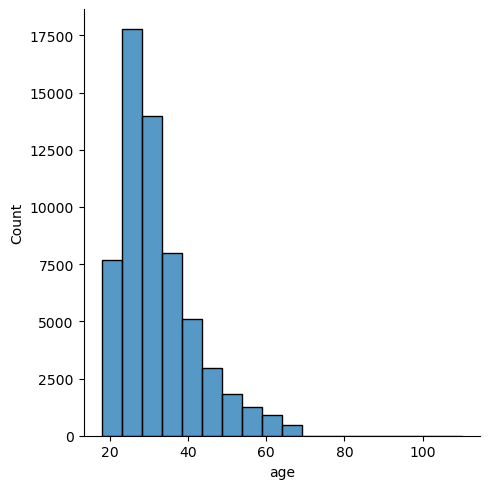

In [10]:
sns.displot(data=profiles,
            x='age',
            kind='hist',
            binwidth = 5);

There is a proportionally similar break down of gender by age, but slightly fewer females overall. 

Counts of Age, by Sex
sex           f      m
age                   
(18, 20]    677    887
(20, 25]   5051   7530
(25, 30]   6476  10960
(30, 35]   4515   6670
(35, 40]   2662   3880
(40, 45]   1742   2519
(45, 50]   1049   1435
(50, 55]    692    786
(55, 60]    569    571
(60, 65]    383    320
(65, 70]    139    122
(70, 111]     1      1


Proportion of Age, by Sex
sex               f         m
age                          
(18, 20]   0.028260  0.024859
(20, 25]   0.210845  0.211037
(25, 30]   0.270329  0.307166
(30, 35]   0.188471  0.186934
(35, 40]   0.111120  0.108741
(40, 45]   0.072717  0.070598
(45, 50]   0.043789  0.040217
(50, 55]   0.028886  0.022029
(55, 60]   0.023752  0.016003
(60, 65]   0.015988  0.008968
(65, 70]   0.005802  0.003419
(70, 111]  0.000042  0.000028


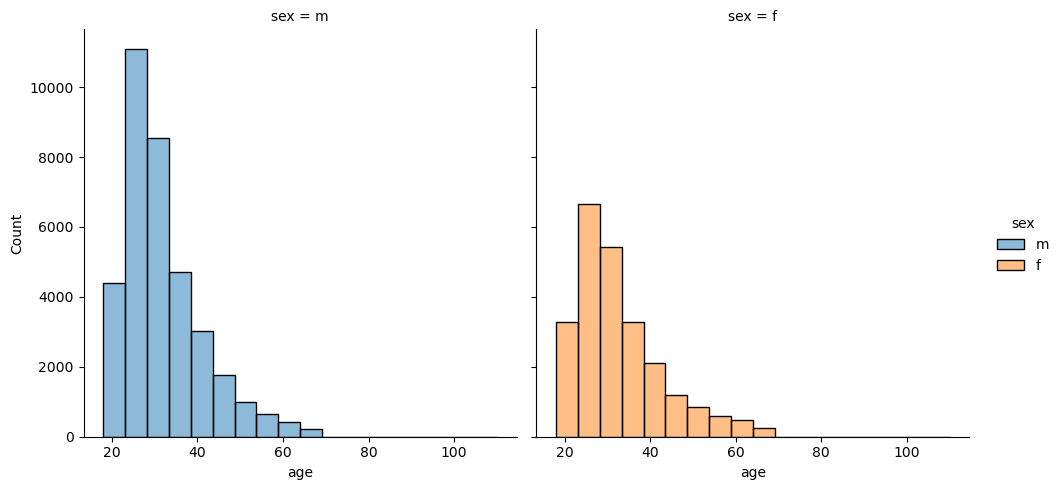

In [11]:
age_bins = [18, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 111]
print('Counts of Age, by Sex')
print(pd.crosstab(index=pd.cut(profiles['age'],
                               bins=age_bins),
                  columns=profiles['sex']))
print('\n')
print('Proportion of Age, by Sex')
print(pd.crosstab(index=pd.cut(profiles['age'],
                               bins=age_bins),
                  columns=profiles['sex'],
                  normalize='columns'))

sns.displot(data=profiles,
            x='age',
            hue='sex',
            col='sex',
            binwidth=5);

#### Height

Most participants are between 60 inches/5 feet (152 cm) and 80 inches/6.6 feet (203 cm) tall.

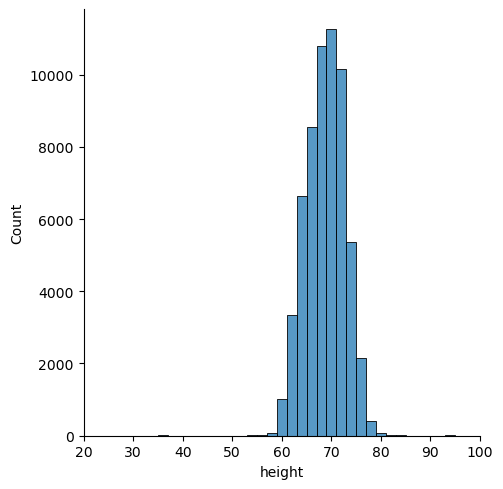

In [12]:
sns.displot(data=profiles,
            x='height',
            kind='hist',
            binwidth=2)

plt.xlim(20, 100);

Analysing by gender, both seem to follow a normal distribution, with females tending to be shorter than males. 

Counts of Height, by Sex
sex           f      m
height                
(0, 36]       5     13
(36, 48]      5      3
(48, 60]   1053     47
(60, 72]  22949  27767
(72, 84]     94   7972
(84, 96]     10     25


Proportion of Height, by Sex
sex              f         m
height                      
(0, 36]   0.000207  0.000363
(36, 48]  0.000207  0.000084
(48, 60]  0.043664  0.001312
(60, 72]  0.951609  0.775030
(72, 84]  0.003898  0.222514
(84, 96]  0.000415  0.000698


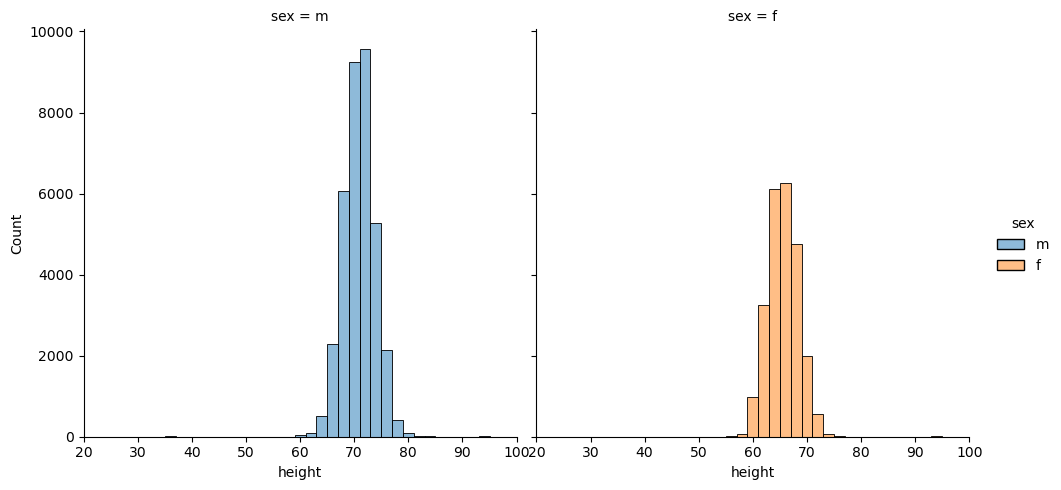

In [13]:
height_bins = [0, 36, 48, 60, 72, 84, 96]
print('Counts of Height, by Sex')
print(pd.crosstab(index=pd.cut(profiles['height'],
                               bins=height_bins),
                  columns=profiles['sex']))
print('\n')
print('Proportion of Height, by Sex')
print(pd.crosstab(index=pd.cut(profiles['height'],
                               bins=height_bins),
                  columns=profiles['sex'],
                  normalize='columns'))

sns.displot(data=profiles,
            x='height',
            hue='sex',
            kind='hist',
            binwidth=2,
            col='sex')

plt.xlim(20,100);

#### Income

As seen above, most participants do not include their income figures.

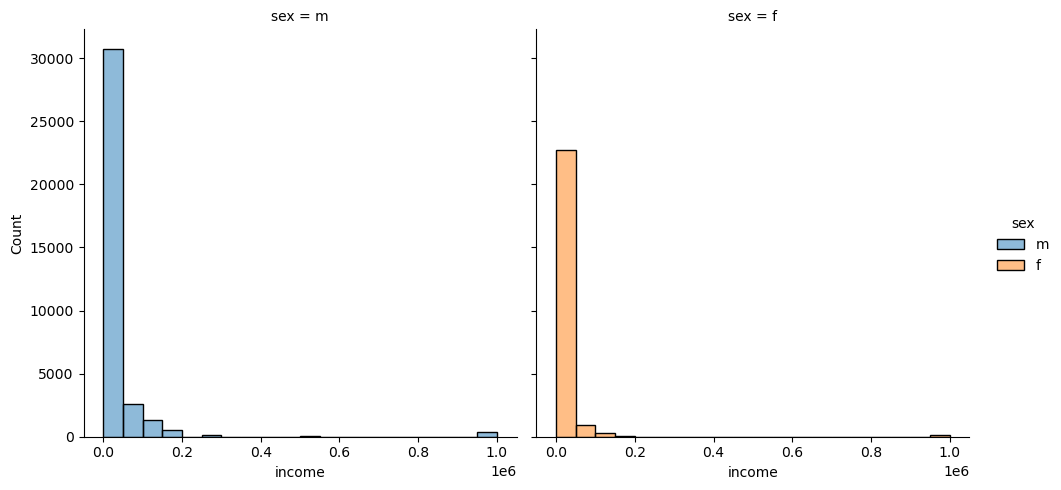

In [14]:
sns.displot(data=profiles,
            x='income',
            hue='sex',
            kind='hist',
            binwidth=50000,
            col='sex');

### Discrete Variables

#### Sex

Previously it was identified that there are more males in the data, and it seems that there are ~35,000 men to ~25,000 women.

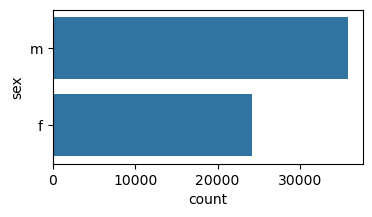

In [15]:
plt.figure(figsize=(4,2))

sns.countplot(data=profiles,
              y='sex');

#### Body Type

Most users describe themselves as average, fit, or athletic.

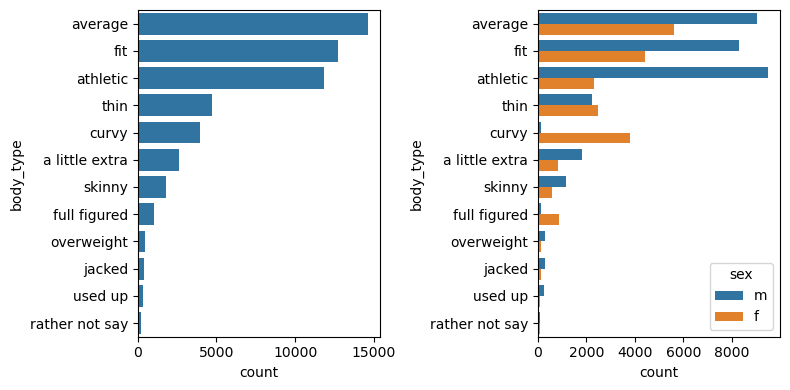

In [16]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,4))

sns.countplot(ax=ax[0],
              data=profiles,
              y='body_type',
              order=profiles['body_type'].value_counts().index)

sns.countplot(ax=ax[1],
              data=profiles,
              y='body_type',
              order=profiles['body_type'].value_counts().index,
              hue='sex')

fig.tight_layout();

When analysing by gender, some descriptions e.g. 'curvy' and 'full figured' are highly female descriptions, while 'a little extra' and 'overweight' are used by males more often.

#### Diet

Most user eat 'mostly anything', followed by 'anything', and 'strictly anything'; being open-minded seems to be a popular signal to potential partners. 

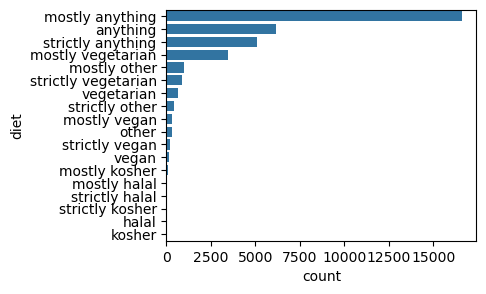

In [17]:
plt.figure(figsize=(4,3))
sns.countplot(data=profiles,
              y='diet',
              order=profiles['diet'].value_counts().index);

#### Drinks

Most users drink 'socially'.

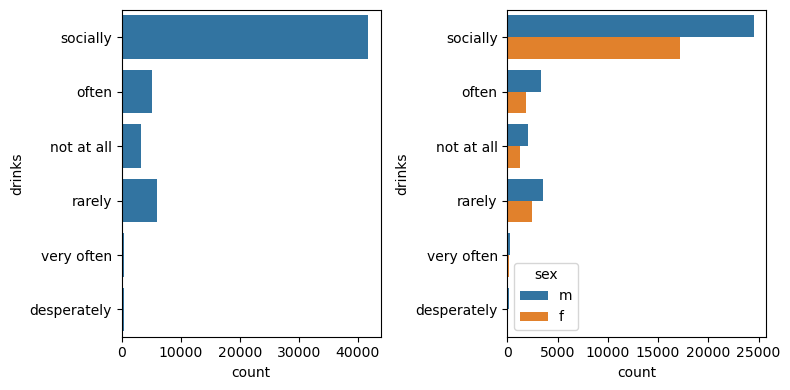

In [18]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,4))

sns.countplot(ax=ax[0],
              data=profiles,
              y='drinks')

sns.countplot(ax=ax[1],
              data=profiles,
              y='drinks',
              hue='sex')

fig.tight_layout();

#### Drugs

Most users 'never' use drugs. 

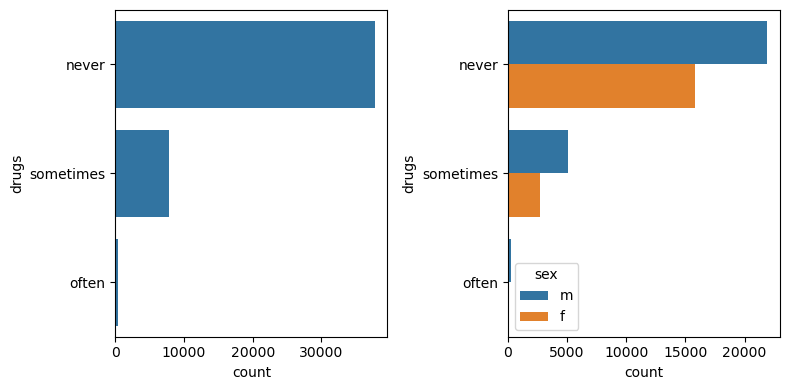

In [19]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,4))

sns.countplot(ax=ax[0],
              data=profiles,
              y='drugs')

sns.countplot(ax=ax[1],
              data=profiles,
              y='drugs',
              hue='sex')

fig.tight_layout();

#### Education

Below you can see the majority of users are graduate from college/university followed by masters programs and those working on college/university. Interestingly space camp related options are fairly a popular options.

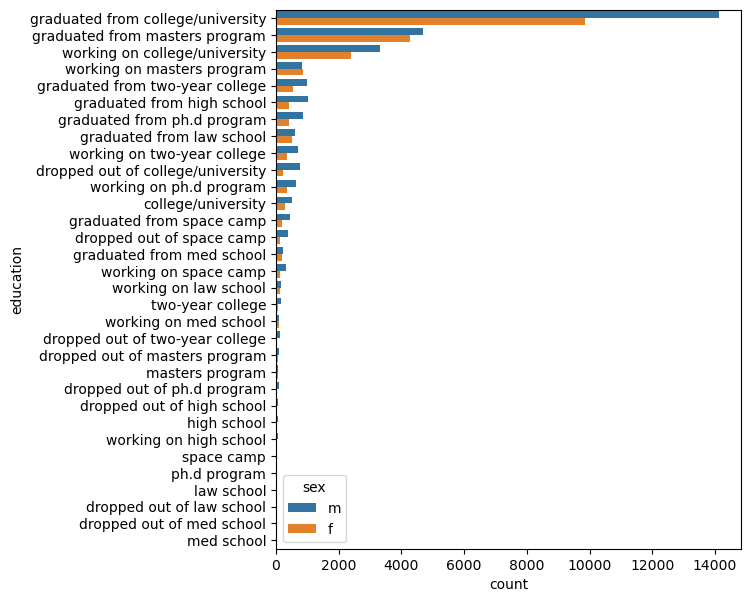

In [20]:
plt.figure(figsize=(6,7))

sns.countplot(data=profiles,
              y='education',
              hue='sex',
              order=profiles['education'].value_counts().index);

#### Jobs

Most users don't fit into the categories provided. Males seem to be employed more in STEM roles, while females more in healthcare and education.

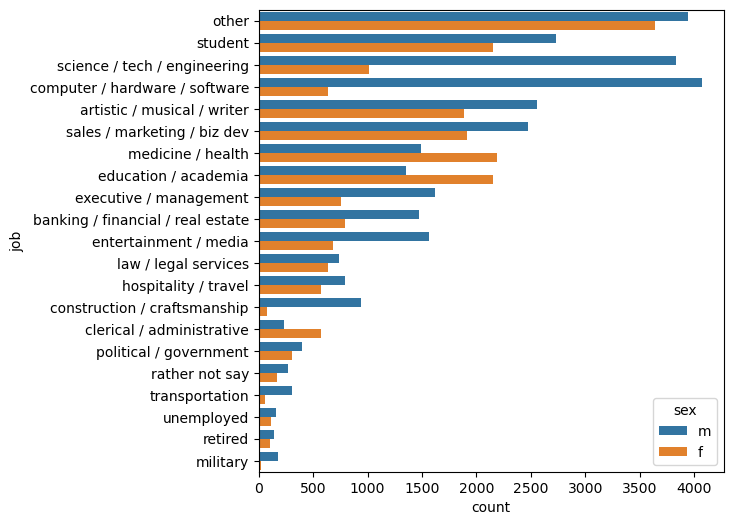

In [21]:
sns.countplot(data=profiles,
              y='job',
              hue='sex',
              order=profiles['job'].value_counts().index);

#### Offspring

The data suggest that most users do not have kids. 

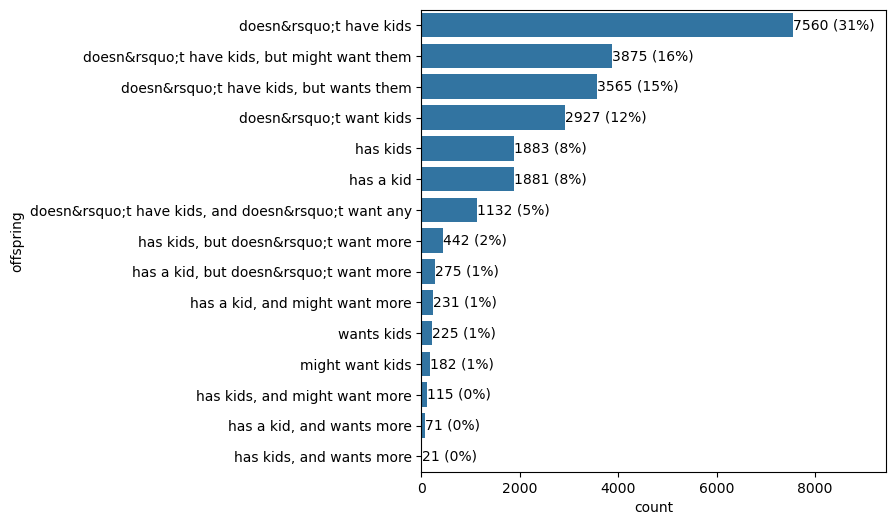

In [22]:
ax = sns.countplot(data=profiles,
                   y='offspring',
                   order=profiles['offspring'].value_counts().index)

# Added annotations for counts and relative percentages
abs_values = profiles['offspring'].value_counts(ascending=False)
rel_values = profiles['offspring'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

ax.bar_label(container=ax.containers[0], labels=lbls)
plt.xlim(0,profiles['offspring'].value_counts().max()*1.25);

In [23]:
profiles['offspring'].unique()

array(['doesn&rsquo;t have kids, but might want them', nan,
       'doesn&rsquo;t want kids',
       'doesn&rsquo;t have kids, but wants them',
       'doesn&rsquo;t have kids', 'wants kids', 'has a kid', 'has kids',
       'doesn&rsquo;t have kids, and doesn&rsquo;t want any',
       'has kids, but doesn&rsquo;t want more',
       'has a kid, but doesn&rsquo;t want more',
       'has a kid, and wants more', 'has kids, and might want more',
       'might want kids', 'has a kid, and might want more',
       'has kids, and wants more'], dtype=object)

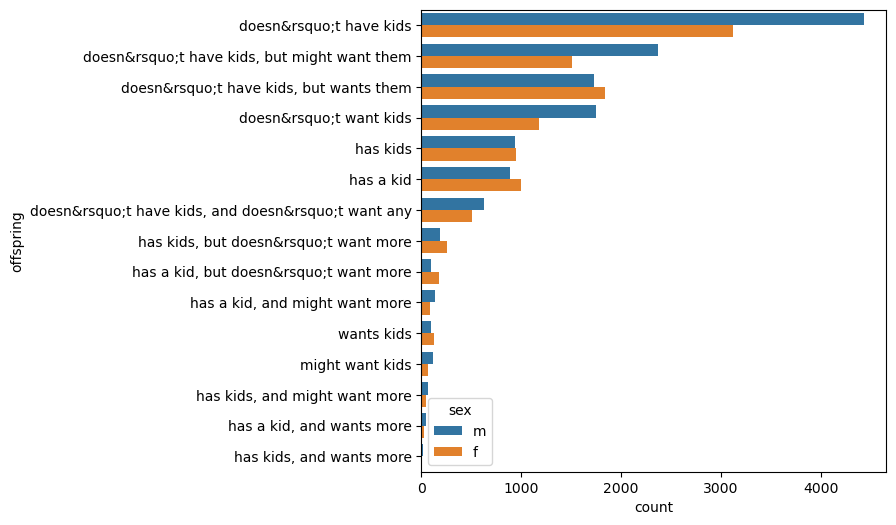

In [24]:
sns.countplot(data=profiles,
              y='offspring',
              hue='sex',
              order=profiles['offspring'].value_counts().index);

#### Orientation

The majority of users are 'straight'.

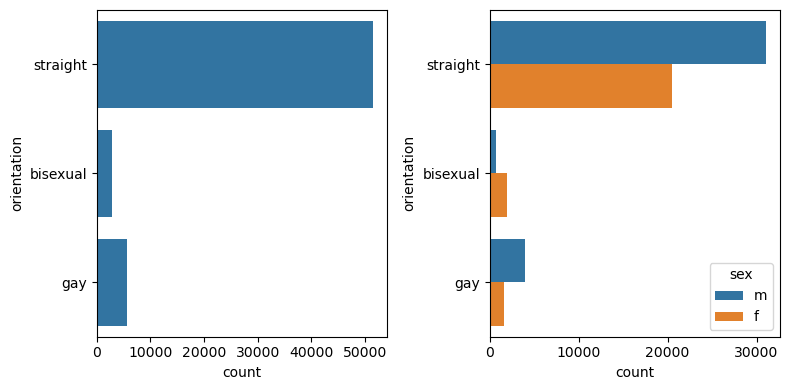

In [25]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,4))

sns.countplot(ax=ax[0],
              data=profiles,
              y='orientation')

sns.countplot(ax=ax[1],
              data=profiles,
              y='orientation',
              hue='sex')

fig.tight_layout();

#### Pets

The chart shows that most users like or has dogs.

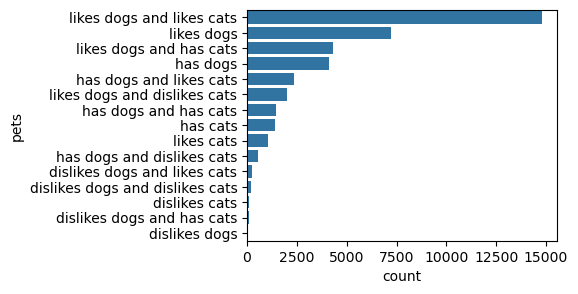

In [26]:
plt.figure(figsize=(4,3))
sns.countplot(data=profiles,
              y='pets',
              order=profiles['pets'].value_counts().index);

#### Religion

Religion was similar to sign where there are a lot of qualifiers.

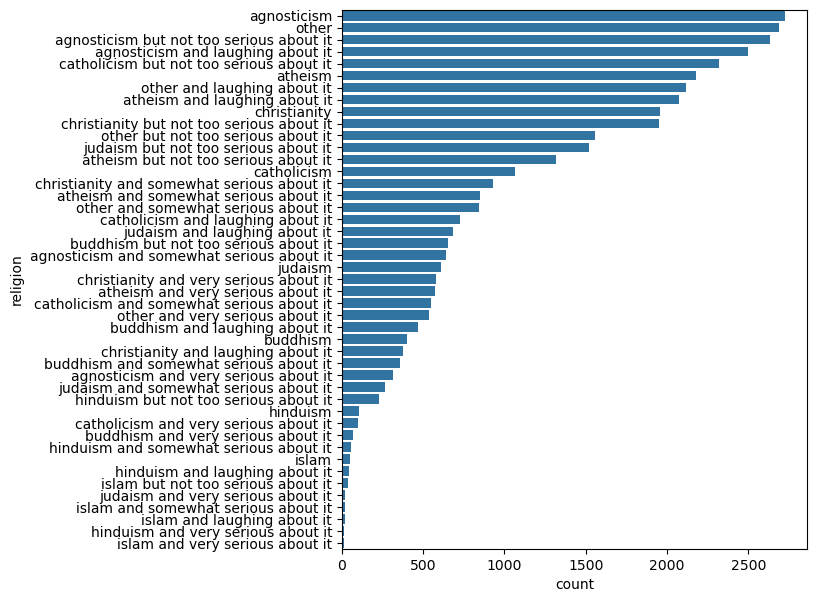

In [27]:
# set figure size
plt.figure(figsize=(6,7))
sns.countplot(data=profiles,
              y='religion',
              order=profiles['religion'].value_counts().index);

Religion was cleaned to take the first word and distilled down to 9 groups. Most were not very religious identifying as agnostic, other, or atheists. 

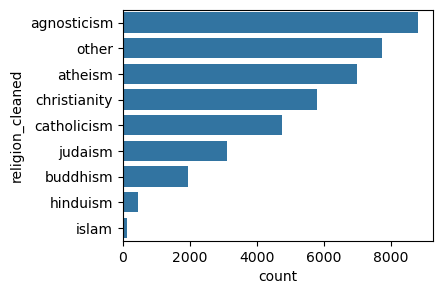

In [28]:
plt.figure(figsize=(4,3))
profiles['religion_cleaned'] = profiles['religion'].str.split().str.get(0)
sns.countplot(data=profiles,
              y='religion_cleaned',
              order=profiles['religion_cleaned'].value_counts().index);

#### Signs

Here are the astrological signs of the users. There are mainly evenly distributed with Capricorns being the rarest and Leos being the most common.

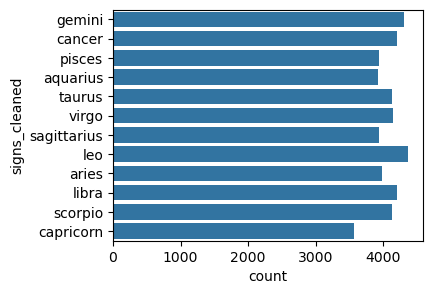

In [31]:
plt.figure(figsize=(4,3))
sns.countplot(data=profiles,
              y='signs_cleaned');

#### Smoking

Similarly for drugs the majority of users chose 'no' for smoking.

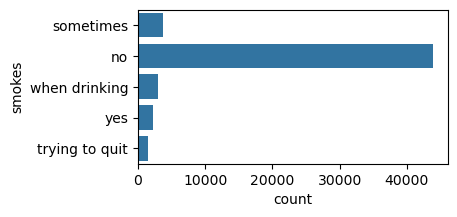

In [32]:
plt.figure(figsize=(4,2))
sns.countplot(data=profiles,
              y='smokes');

#### Status

The relationship status for a dating website is fairly predictable. One would assume that most people are single and available which is reflected in the data.

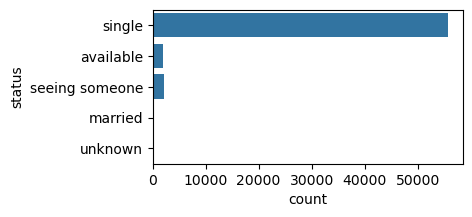

In [33]:
plt.figure(figsize=(4,2))
sns.countplot(data=profiles,
              y='status');

### Data Preparation


#### Missing Data

Checking for missing data as they are often not handled by machine learning algorithms well. Such data may need to be imputed or removed. It seems that many of the columns do have missing values.

In [34]:
profiles.isnull().sum().sort_values(ascending=False)

offspring           35561
diet                24395
religion            20226
religion_cleaned    20226
pets                19921
essay8              19225
drugs               14080
essay6              13771
essay9              12603
essay7              12451
essay3              11476
sign                11056
signs_cleaned       11056
essay5              10850
essay4              10537
essay2               9638
job                  8198
essay1               7572
education            6628
ethnicity            5680
smokes               5512
essay0               5488
body_type            5296
drinks               2985
speaks                 50
height                  3
last_online             0
location                0
income                  0
orientation             0
sex                     0
status                  0
age                     0
dtype: int64

#### Preprocessing 

The data for the model is going to be a subset of the variables. The variables were selected because they might be a good predictor for astrological signs; other variables that were not selected such as `age` are probably not a good indicators. 

Here na values are dropped to create a fully complete data set. 

In [37]:
cols = ['body_type', 'diet', 'orientation', 'pets', 'religion_cleaned',
       'sex', 'job', 'signs_cleaned']
df = profiles[cols].dropna()
df.shape

(16453, 8)

#### Dummy Variables

In this next step, dummy variables are created to deal with the categorical variables. Dummy variables will turn the categories per variable into its own binary identifier. The data now has 81 features to predict signs. 

In [38]:
for col in cols[:-1]:
    df = pd.get_dummies(df, columns=[col], prefix = [col])

In [39]:
df.head()

,signs_cleaned,body_type_a little extra,body_type_athletic,body_type_average,body_type_curvy,body_type_fit,body_type_full figured,body_type_jacked,body_type_overweight,body_type_rather not say,...,job_military,job_other,job_political / government,job_rather not say,job_retired,job_sales / marketing / biz dev,job_science / tech / engineering,job_student,job_transportation,job_unemployed
0,gemini,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,cancer,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,taurus,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,sagittarius,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,cancer,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


#### Label Imbalance 

For multi-class problems where two or more outcomes are possible for prediction, there is a need to check for imbalance in the prediction label.

An imbalance in a response variable where some labels only occur a few times will result in the more frequently occurring labels being predicted more often compared to the less frequent labels, as there is not enough data for machine learning algorithms to train with.

In the given dataset, we observe that the counts of all the zodiac signs are more or less equal (i.e., without large deviations). Hence, we do not have to worry about imbalances and trying to address this problem.

               count
signs_cleaned       
leo             1516
gemini          1496
cancer          1457
virgo           1451
taurus          1390
scorpio         1356
libra           1354
pisces          1334
aries           1328
sagittarius     1312
aquarius        1262
capricorn       1197


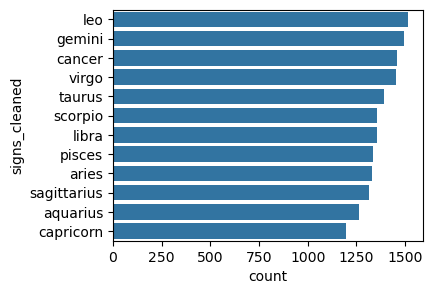

In [41]:
signs_cleaned = pd.DataFrame(df['signs_cleaned'].value_counts())
print(signs_cleaned)

plt.figure(figsize=(4,3))
sns.barplot(data=signs_cleaned,
            x='count',
            y='signs_cleaned');

#### Split Data into Train/Test sets

In [42]:
col_length = len(df.columns)

#Y is the target column, X has the rest
X = df.iloc[:, 1:col_length]
y = df.iloc[:, 0:1]

#Validation chunk size
val_size = 0.25

#Split the data into chunks
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=val_size, random_state = 0)

#turn in to 1d arrays
y_train = y_train.to_numpy().ravel()
y_test = y_test.to_numpy().ravel()

### Prediction 

#### model building 

Now it's time to create some models, here is a list of [Multi class models](https://scikit-learn.org/stable/modules/multiclass.html) available in scikit learn. For this project three common algorithms will be used to make predictions.

Below, the respective modules for Logistic Regression, Decision Trees, and KNN are loaded.

In [43]:
# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

#### Evaluation Metrics

In the models, there will be several values that can be evaluated below is a quick diagram:
![](https://miro.medium.com/max/1400/1*UVP_xb4F6J-M-xH3haz5Jw.png)
here is a quick description of the metrics:

- **Accuracy:** is the correct values divided by total values
- **Precision:** is the True Positives divided by the sum of True Positives and False Positives (the positive guesses).
- **Recall:** is the True Positives divided by the sum of True Positives and False Negatives (the actual positive values).
- **F1-score:** is a blended score of precision and recall which balances both values.
- **Macro Avg:** is the unweighted mean value of precision and recall. 
- **Weighted Avg:** is the weighted mean value of precision and recall by the support values for each class.
- **Support:** is the number of observations in class to predict. 

#### Logistic Regression

Setting `multi_class='multinomial'` for multiclass predictions.

In [44]:
lr_model = LogisticRegression(multi_class='multinomial').fit(X_train, y_train)
lr_predictions = lr_model.predict(X_train)

Training accuracy of the logistic regression model is 12%, which is poor considering a random guess (1 in 12) should result in being correct ~8% of the time.

In [45]:
from sklearn.metrics import classification_report
print(classification_report(y_train, lr_predictions))

              precision    recall  f1-score   support

    aquarius       0.13      0.07      0.09       968
       aries       0.12      0.10      0.11       983
      cancer       0.13      0.24      0.17      1129
   capricorn       0.14      0.05      0.07       882
      gemini       0.12      0.15      0.13      1130
         leo       0.12      0.19      0.15      1121
       libra       0.11      0.08      0.09      1028
      pisces       0.11      0.09      0.10       997
 sagittarius       0.13      0.09      0.11       965
     scorpio       0.14      0.05      0.08      1001
      taurus       0.13      0.12      0.12      1045
       virgo       0.12      0.21      0.15      1090

    accuracy                           0.12     12339
   macro avg       0.12      0.12      0.11     12339
weighted avg       0.12      0.12      0.12     12339



#### K Nearest Neighbor

This model had a 33% training accuracy which is better than the logistic regression model above.

In [46]:
knn_model = KNeighborsClassifier(n_neighbors = 5).fit(X_train, y_train)
knn_predictions = knn_model.predict(X_train.values)

In [47]:
print(classification_report(y_train, knn_predictions))

              precision    recall  f1-score   support

    aquarius       0.26      0.65      0.37       968
       aries       0.27      0.50      0.35       983
      cancer       0.27      0.41      0.33      1129
   capricorn       0.34      0.32      0.33       882
      gemini       0.37      0.34      0.35      1130
         leo       0.38      0.29      0.33      1121
       libra       0.39      0.26      0.31      1028
      pisces       0.40      0.25      0.31       997
 sagittarius       0.42      0.22      0.29       965
     scorpio       0.41      0.23      0.30      1001
      taurus       0.42      0.25      0.31      1045
       virgo       0.42      0.24      0.31      1090

    accuracy                           0.33     12339
   macro avg       0.36      0.33      0.32     12339
weighted avg       0.36      0.33      0.32     12339



#### Decision Trees

Decision Tree will be trained without adjusting `max_depth` at first i.e. `max_depth=none` which means that the model will expand nodes until all leaves are pure or until all leaves contain less than min_samples_split samples.

Training accuracy is 78%, but is likely to be overfit to the data given no limitations on tree depth was set.

In [48]:
tree_model = DecisionTreeClassifier().fit(X_train, y_train) 
tree_predictions = tree_model.predict(X_train) 

In [49]:
print(classification_report(y_train, tree_predictions))

              precision    recall  f1-score   support

    aquarius       0.67      0.94      0.78       968
       aries       0.66      0.88      0.75       983
      cancer       0.71      0.86      0.77      1129
   capricorn       0.74      0.84      0.79       882
      gemini       0.78      0.79      0.79      1130
         leo       0.80      0.80      0.80      1121
       libra       0.79      0.76      0.78      1028
      pisces       0.82      0.74      0.78       997
 sagittarius       0.91      0.70      0.79       965
     scorpio       0.89      0.71      0.79      1001
      taurus       0.93      0.70      0.80      1045
       virgo       0.94      0.67      0.78      1090

    accuracy                           0.78     12339
   macro avg       0.80      0.78      0.78     12339
weighted avg       0.80      0.78      0.78     12339



Visualising the confusion matrix of the results with the true values on the y-axis and predicted values along the x-axis. The diagonals (True Positives) being lighter in color and having higher numbers suggest high accuracy.

In [50]:
from sklearn.metrics import confusion_matrix 
tree_cm = confusion_matrix(y_train, tree_predictions)
tree_labels = tree_model.classes_

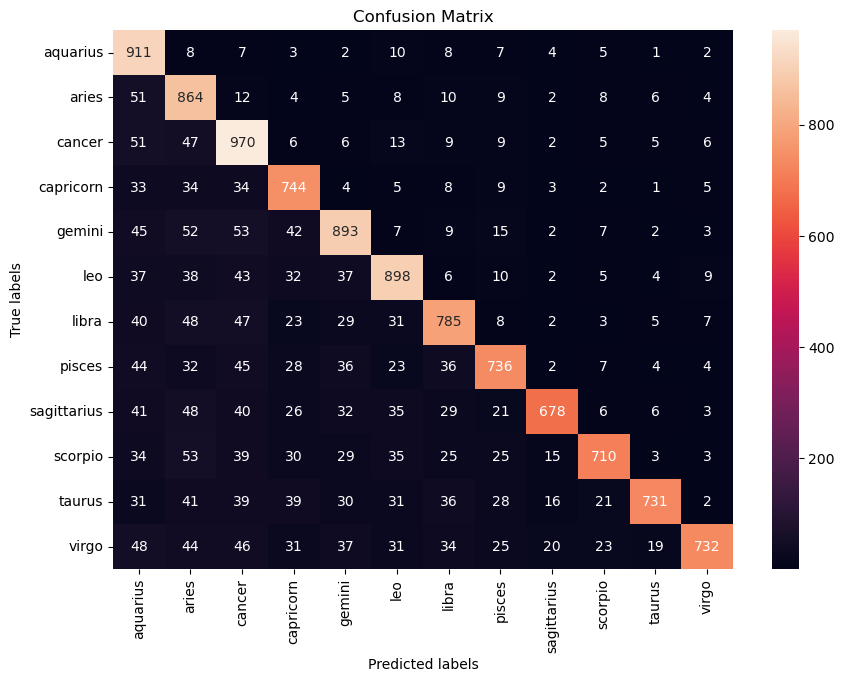

In [51]:
plt.figure(figsize=(10,7))

ax= plt.subplot()
sns.heatmap(tree_cm, annot=True, ax = ax,fmt='d');

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
ax.yaxis.set_tick_params(rotation=360)
ax.xaxis.set_tick_params(rotation=90)

ax.xaxis.set_ticklabels(tree_labels); 
ax.yaxis.set_ticklabels(tree_labels);

As expected from not limiting tree depth, this tree model has a depth of 49 branches, which will probably not generalize to another dataset.

In [52]:
tree_model.get_depth()

49

5-fold cross validation on the 49-branch Decision Tree yielded worse results than the KNN and was similar to the Logistic Regression model with the baseline accuracy at ~9%.

In [53]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits=5, shuffle=True, random_state=0)
results = cross_val_score(tree_model, X_train, y_train, cv=kfold, scoring='accuracy')

print(results)
print('Baseline: %.2f%% (%.2f%%)' % (results.mean()*100, results.std()*100))

[0.08468395 0.09440843 0.09278768 0.09724473 0.08877179]
Baseline: 9.16% (0.44%)


Remodelling a decision tree with a `max_depth` of 20 yields a new accuracy rate of ~41% is worse than the first iteration, but slightly better than the KNN model. 

In [54]:
tree_model20 = DecisionTreeClassifier(max_depth = 20).fit(X_train, y_train) 
tree_predictions20 = tree_model20.predict(X_train)

In [55]:
print(classification_report(y_train, tree_predictions20))

              precision    recall  f1-score   support

    aquarius       0.57      0.40      0.47       968
       aries       0.43      0.43      0.43       983
      cancer       0.37      0.50      0.43      1129
   capricorn       0.52      0.42      0.47       882
      gemini       0.40      0.44      0.42      1130
         leo       0.36      0.48      0.41      1121
       libra       0.28      0.41      0.34      1028
      pisces       0.61      0.34      0.44       997
 sagittarius       0.65      0.33      0.44       965
     scorpio       0.37      0.39      0.38      1001
      taurus       0.53      0.39      0.45      1045
       virgo       0.32      0.39      0.36      1090

    accuracy                           0.41     12339
   macro avg       0.45      0.41      0.42     12339
weighted avg       0.45      0.41      0.42     12339



5-fold cross validation on the smaller 20-branch Decision Tree still averaged ~8% which is not as performative as the KNN model. 

In [56]:
results20 = cross_val_score(tree_model20, X_train, y_train, cv=kfold, scoring='accuracy')

print(results20)
print('Baseline: %.2f%% (%.2f%%)' % (results20.mean()*100, results.std()*100))

[0.07536467 0.08549433 0.08508914 0.08306321 0.08998784]
Baseline: 8.38% (0.44%)


#### Final Model

The `knn_model` might be the best model for OkCupid to use when users don't have their signs listed on their user profile.

Validating the KNN model's accuracy with the validation data, however, yields ~8% accuracy which is also not very predictive.

In [57]:
knn_predictionsVal = knn_model.predict(X_test.values) 
print(classification_report(y_test, knn_predictionsVal))

              precision    recall  f1-score   support

    aquarius       0.07      0.22      0.11       294
       aries       0.09      0.15      0.11       345
      cancer       0.08      0.13      0.10       328
   capricorn       0.09      0.08      0.09       315
      gemini       0.08      0.08      0.08       366
         leo       0.08      0.06      0.07       395
       libra       0.10      0.07      0.08       326
      pisces       0.09      0.06      0.07       337
 sagittarius       0.09      0.04      0.05       347
     scorpio       0.10      0.05      0.07       355
      taurus       0.11      0.07      0.08       345
       virgo       0.10      0.06      0.07       361

    accuracy                           0.09      4114
   macro avg       0.09      0.09      0.08      4114
weighted avg       0.09      0.09      0.08      4114



In the confusion matrix, Cancer, Gemini, Leo, and Virgo were predicted most often, but was not especially accurate since the vertical colour band represents evenly distributed guesses. 

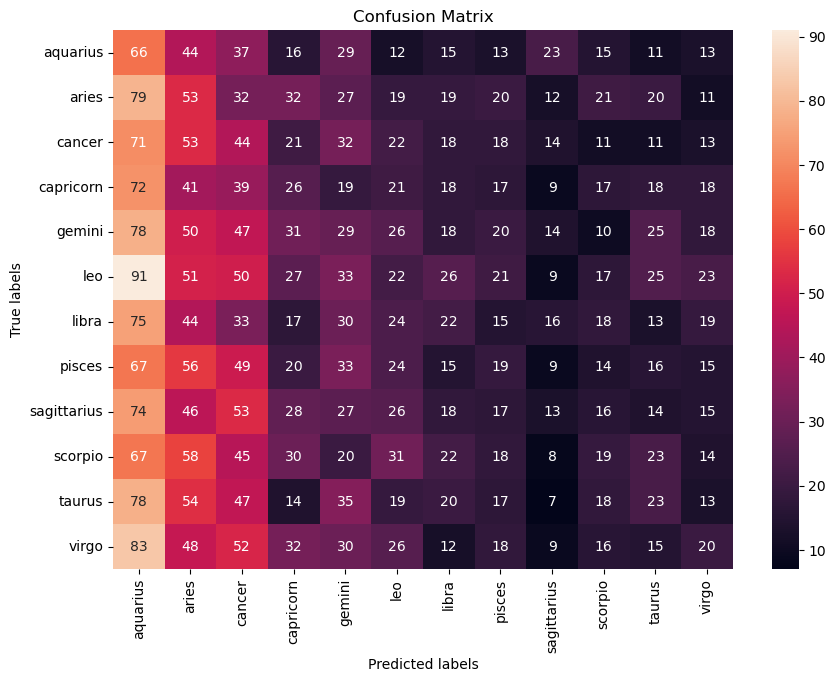

In [58]:
final_cm = confusion_matrix(y_test, knn_predictionsVal)
knn_labels = knn_model.classes_

plt.figure(figsize=(10,7))

ax= plt.subplot()
sns.heatmap(final_cm, annot=True, ax = ax, fmt='d');

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
ax.yaxis.set_tick_params(rotation=360)
ax.xaxis.set_tick_params(rotation=90)

ax.xaxis.set_ticklabels(knn_labels); 
ax.yaxis.set_ticklabels(knn_labels);

### Conclusion


#### General Comments

Classification machine learning algorithms were used to predict astrological signs of OkCupid users.

Astrology has seen a resurgence in popularity in selection of partners, and sign compatibility is of apparent importance to such selection.

If users don't input their signs, an algorithmic solution could have generated a sign to impute missing data when making matches.

Unsurprisingly, even the best model here did not predict a user's star sign better than basic guessing.


#### Next Steps 

Next steps will be to seriously consider whether it is possible (or necessary) to predict user's astrological signs, or if there is a way to do so given more data. Another possibility is to add additional models or tune hyperparameters of the used models to see if any more predictive power could be squeezed out of the algorithms.